In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

#model building
#import scipy.stats as ss
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

In [9]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
combined = [train, test]

alldata=pd.concat(combined, sort=True).reset_index(drop=True) #Join the dfs vertically.survived column of test is currently filled w NaNs
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
print(train.shape)
print(test.shape) #does not have survived column. we are to predict that!
print(alldata.shape)

(891, 12)
(418, 11)
(1309, 12)


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


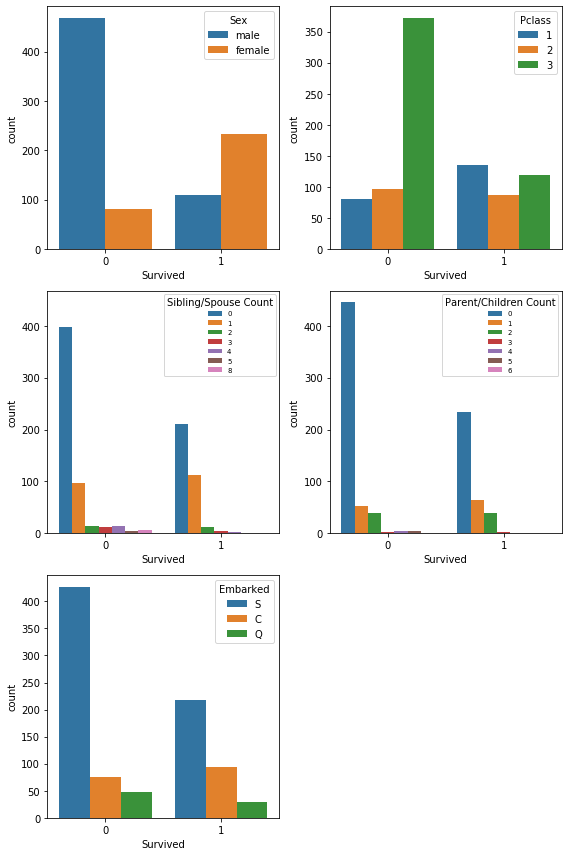

In [13]:
fig=plt.figure()
ax1=plt.subplot(321)
sns.countplot(x = 'Survived', hue = 'Sex', data = train, ax=ax1)

ax2=plt.subplot(322)
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, ax=ax2)

ax3=plt.subplot(323)
sns.countplot(x = 'Survived', hue = 'SibSp', data = train, ax=ax3)
ax3.legend(loc=1, title='Sibling/Spouse Count', fontsize='x-small')

ax4=plt.subplot(324, sharey=ax3)
sns.countplot(x = 'Survived', hue = 'Parch', data = train, ax=ax4)
ax4.legend(loc=1, title='Parent/Children Count', fontsize='x-small')

ax5=plt.subplot(325)
sns.countplot(x = 'Survived', hue = 'Embarked', data = train, ax=ax5)
ax5.legend(loc=1, title='Embarked')

#ax6=plt.subplot(326)
#sns.countplot(x = 'Survived', hue = 'Cabin', data = train, ax=ax6)
#ax6.legend(loc=1, title='Cabin')

fig.set_size_inches(8,12)
fig.tight_layout()

In [14]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [16]:
#checking missing values
print('Training Set\n')
print(train.isnull().sum())
print('-'*40)
print('Test Set\n')
print(test.isnull().sum())

Training Set

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
Test Set

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
#correlation matrix for all features.
corr_matr=(alldata.drop('PassengerId', axis=1).corr().abs().unstack().reset_index().rename(columns={'level_0':'Feature 1','level_1':'Feature 2', 0:'corr'})
.sort_values(by=['Feature 1','corr'], ascending=[True,False]))
corr_matr

,Feature 1,Feature 2,corr
0,Age,Age,1.000000
3,Age,Pclass,0.408106
4,Age,SibSp,0.243699
1,Age,Fare,0.178740
2,Age,Parch,0.150917
5,Age,Survived,0.077221
7,Fare,Fare,1.000000
9,Fare,Pclass,0.558629
11,Fare,Survived,0.257307
8,Fare,Parch,0.221539


In [18]:
#number of null records to fill in age column
alldata.groupby(['Sex','Embarked', 'Pclass']).size()-alldata.groupby(['Sex', 'Embarked', 'Pclass'])['Age'].count()

Sex     Embarked  Pclass
female  C         1          6
                  2          0
                  3          9
        Q         1          0
                  2          1
                  3         35
        S         1          5
                  2          2
                  3         20
male    C         1          7
                  2          4
                  3         32
        Q         1          0
                  2          1
                  3         36
        S         1         21
                  2          8
                  3         76
dtype: int64

In [19]:
alldata['Age'] = alldata.groupby(['Sex', 'Embarked', 'Pclass'])['Age'].apply( lambda x: x.fillna(x.median()) )
alldata.isnull().sum()

Age               2
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [20]:
alldata[alldata.Embarked.isnull()]


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,NaN,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,NaN,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [21]:
alldata.Embarked=alldata.Embarked.fillna('S')
alldata.isnull().sum()


Age               2
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [22]:
alldata[alldata.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [23]:
alldata.Fare=alldata.Fare.fillna(alldata.groupby(['Pclass', 'Parch']).median().Fare[3][0])
alldata.isnull().sum()

Age               2
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [24]:
#First letter indicates the deck.
alldata['Deck']=alldata.Cabin.str.extract('([A-Za-z]+)', expand=False)
alldata['Deck']=alldata['Deck'].fillna('M') #M:missing

In [25]:
df=alldata.groupby(['Deck', 'Pclass']).agg(Count=pd.NamedAgg(column='Name', aggfunc='count'), Survived=pd.NamedAgg('Survived', sum))
df_decks=pd.DataFrame(df.groupby(level=0).apply(lambda df: df.xs(df.name).Count.to_dict()).to_dict())
df_decks=df_decks.fillna(0)  
print(df)
df_decks

             Count  Survived
Deck Pclass                 
A    1          22       7.0
B    1          65      35.0
C    1          94      35.0
D    1          40      22.0
     2           6       3.0
E    1          34      18.0
     2           4       3.0
     3           3       3.0
F    2          13       7.0
     3           8       1.0
G    3           5       2.0
M    1          67      19.0
     2         254      74.0
     3         693     113.0
T    1           1       0.0


,A,B,C,D,E,F,G,M,T
1,22.0,65.0,94.0,40.0,34,0.0,0.0,67,1.0
2,0.0,0.0,0.0,6.0,4,13.0,0.0,254,0.0
3,0.0,0.0,0.0,0.0,3,8.0,5.0,693,0.0


In [26]:
# Creating a dictionary for percentage of pessengers for each pclass and deck
deck_percentages={}
for col in df_decks.columns:
    deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
deck_percentages=pd.DataFrame(deck_percentages)     
deck_percentages

,A,B,C,D,E,F,G,M,T
0,100.0,100.0,100.0,86.956522,82.926829,0.000000,0.0,6.607495,100.0
1,0.0,0.0,0.0,13.043478,9.756098,61.904762,0.0,25.049310,0.0
2,0.0,0.0,0.0,0.000000,7.317073,38.095238,100.0,68.343195,0.0


Text(0.5, 1.0, 'Passenger class percentage per deck')

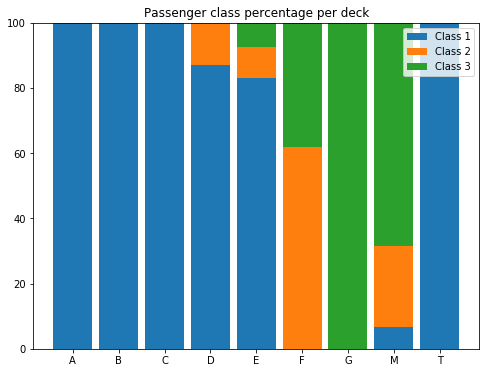

In [27]:
deck_names = deck_percentages.columns.tolist()
bar_count = np.arange(len(deck_names))  

plt.bar(bar_countplt.figure(figsize=(8,6))
, deck_percentages.iloc[0], width=0.85, label='Class 1')
plt.bar(bar_count, deck_percentages.iloc[1], bottom=deck_percentages.iloc[0], width=0.85, label='Class 2')
plt.bar(bar_count, deck_percentages.iloc[2], bottom=deck_percentages.iloc[0]+deck_percentages.iloc[1],width=0.85, label='Class 3')
plt.xticks(bar_count, deck_names)  
plt.legend()
plt.title('Passenger class percentage per deck')

In [28]:
alldata.loc[alldata.Deck=='T','Deck']='A'
alldata['Deck'] = alldata['Deck'].replace(['A', 'B', 'C'], 'ABC')
alldata['Deck'] = alldata['Deck'].replace(['D', 'E'], 'DE')
alldata['Deck'] = alldata['Deck'].replace(['F', 'G'], 'FG')

alldata['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [29]:
alldata=alldata.drop('Cabin', axis=1)


In [30]:
#update train and test dfs
train=alldata.loc[:890]
test=alldata.loc[891:].drop('Survived', axis=1)
combined = [train, test]

In [31]:
train_corr=(train.drop('PassengerId', axis=1).corr().abs().unstack().reset_index()
            .rename(columns={'level_0':'Feature 1','level_1':'Feature 2', 0:'corr'})
            .sort_values(by=['Feature 1','corr'], ascending=[True,False]))
train_corr=train_corr.query('corr!=1').drop([6,12,13,18,19,24,25,26,31,33])
train_corr=train_corr.query('corr>0.1').sort_values(by='corr', ascending=False)

In [32]:
test_corr=(test.drop('PassengerId', axis=1).corr().abs().unstack().reset_index()
            .rename(columns={'level_0':'Feature 1','level_1':'Feature 2', 0:'corr'})
            .sort_values(by=['Feature 1','corr'], ascending=[True,False]))
test_corr=test_corr.query('corr!=1').reset_index(drop=True).drop([5,10,13,18, 9,12,17, 14,16])
test_corr=test_corr.query('corr>=0.1').sort_values(by='corr', ascending=False)

In [33]:
#NaNs correlations actually correspond to correlations that are smaller than 0.1
corr=pd.merge(train_corr, test_corr, on=['Feature 1', 'Feature 2'], how='outer', suffixes=['_train', '_test'])
corr

,Feature 1,Feature 2,corr_train,corr_test
0,Fare,Pclass,0.549500,0.577488
1,Age,Pclass,0.415911,0.526966
2,Parch,SibSp,0.414838,0.306895
3,Pclass,Survived,0.338481,NaN
4,Fare,Survived,0.257307,NaN
5,Age,SibSp,0.247002,NaN
6,Fare,Parch,0.216225,0.230409
7,Age,Parch,0.176092,NaN
8,Fare,SibSp,0.159651,0.172031
9,Age,Fare,0.122696,0.341935


Text(0.5, 1, 'Correlation matrix for test set')

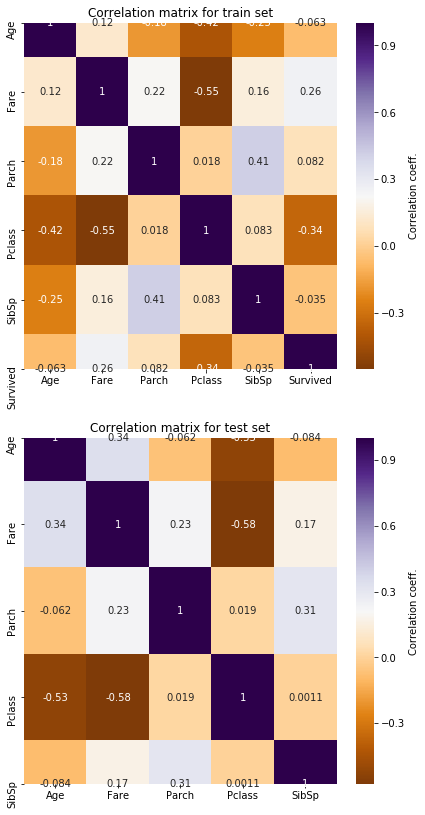

In [34]:
fig, axs=plt.subplots(2,1, figsize=(7,14))
sns.heatmap(train.drop('PassengerId', axis=1).corr(), ax=axs[0], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")
sns.heatmap(test.drop('PassengerId', axis=1).corr(),  ax=axs[1], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")
axs[0].set_title('Correlation matrix for train set')
axs[1].set_title('Correlation matrix for test set')

In [35]:
alldata['Title']=alldata.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.replace(" ","")

In [36]:
alldata.Title.value_counts() #title value counts


Mr             757
Miss           260
Mrs            197
Master          61
Rev              8
Dr               8
Col              4
Ms               2
Major            2
Mlle             2
Lady             1
Capt             1
Mme              1
Don              1
Dona             1
Jonkheer         1
Sir              1
theCountess      1
Name: Title, dtype: int64

In [37]:
alldata['Title'] = alldata['Title'].replace(['Lady', 'theCountess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
alldata['Title'] = alldata['Title'].replace('Mlle', 'Miss')
alldata['Title'] = alldata['Title'].replace('Ms', 'Miss')
alldata['Title'] = alldata['Title'].replace('Mme', 'Mrs')

alldata['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [38]:
print (alldata[['Title', 'Survived']].groupby(['Title']).mean())


        Survived
Title           
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rare    0.347826


In [39]:
alldata['FamilySize']=alldata['SibSp']+alldata['Parch']+1


In [40]:
alldata.head()


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,FamilySize
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,Mr,2
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,Mrs,2
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,Miss,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,Mrs,2
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,Mr,1


In [41]:
alldata.loc[:,'IsAlone']=alldata.FamilySize==1
alldata['IsAlone']=alldata['IsAlone']*1

In [42]:
alldata['Surname']=alldata.Name.apply(lambda x: str.split(x, ",")[0])
surnames=alldata.Surname.value_counts()
surnames

Andersson    11
Sage         11
Asplund       8
Goodwin       8
Davies        7
             ..
Cassebeer     1
Nourney       1
McCormack     1
Stankovic     1
Pavlovic      1
Name: Surname, Length: 875, dtype: int64

In [43]:
surnames.value_counts()


1     637
2     133
3      63
4      22
6       9
5       6
11      2
8       2
7       1
Name: Surname, dtype: int64

In [44]:
for i in range(2,12):
    print( 'Number of groups consists of {} people, with the same ticket number: {} '.format( i, (alldata['Ticket'].value_counts()==i).sum()) )

Number of groups consists of 2 people, with the same ticket number: 132 
Number of groups consists of 3 people, with the same ticket number: 49 
Number of groups consists of 4 people, with the same ticket number: 16 
Number of groups consists of 5 people, with the same ticket number: 7 
Number of groups consists of 6 people, with the same ticket number: 4 
Number of groups consists of 7 people, with the same ticket number: 5 
Number of groups consists of 8 people, with the same ticket number: 2 
Number of groups consists of 9 people, with the same ticket number: 0 
Number of groups consists of 10 people, with the same ticket number: 0 
Number of groups consists of 11 people, with the same ticket number: 1 


In [45]:
fare_counts=alldata['Fare'].value_counts().value_counts().reset_index().sort_values(by='index').rename(columns={'index':'consists_of'})
for i in fare_counts['consists_of']:
    print( 'Number of groups consists of {} people, with the same fare: {} '.format(i, fare_counts.loc[fare_counts.consists_of==i,'Fare'].values[0]) )

Number of groups consists of 1 people, with the same fare: 77 
Number of groups consists of 2 people, with the same fare: 74 
Number of groups consists of 3 people, with the same fare: 43 
Number of groups consists of 4 people, with the same fare: 23 
Number of groups consists of 5 people, with the same fare: 11 
Number of groups consists of 6 people, with the same fare: 11 
Number of groups consists of 7 people, with the same fare: 10 
Number of groups consists of 8 people, with the same fare: 4 
Number of groups consists of 9 people, with the same fare: 3 
Number of groups consists of 10 people, with the same fare: 4 
Number of groups consists of 11 people, with the same fare: 3 
Number of groups consists of 12 people, with the same fare: 2 
Number of groups consists of 14 people, with the same fare: 1 
Number of groups consists of 17 people, with the same fare: 1 
Number of groups consists of 18 people, with the same fare: 1 
Number of groups consists of 21 people, with the same far

In [46]:
df_fare=alldata.loc[alldata['FamilySize']>1, ["Surname","Fare", "FamilySize"]].iloc[:len(train)]
(df_fare.sort_values(by='Surname', ascending=True).groupby(['Surname', 'FamilySize']).nunique().Fare!=1).sum()/len(train)*100

1.6835016835016834

In [47]:
df_ticket=alldata.loc[alldata['FamilySize']>1, ["Surname","Ticket", "FamilySize"]].iloc[:len(train)]
(df_ticket.sort_values(by='Surname', ascending=True).groupby(['Surname', 'FamilySize']).nunique().Ticket!=1).sum()/len(train)*100

2.8058361391694726

In [49]:
alldata['Family_Survival']=0.5 #initial survival value. We gonna change this in a bit.
for groupname, group_df in alldata.groupby(['Surname', 'Fare']):
    if len(group_df)!=1: #we found ourselves a family!
        for idx, row in group_df.iterrows():
            smax=group_df.drop(idx).Survived.max()
            smin=group_df.drop(idx).Survived.min()
            passid=row['PassengerId']
            if (smax == 1.0):
                alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 1
            elif (smin==0.0):
                alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 0
                
print("Number of passengers with family survival information:", 
      alldata.loc[alldata['Family_Survival']!=0.5].shape[0])
print("Number of passengers without family survival information:", 
      alldata.loc[alldata['Family_Survival']==0.5].shape[0])

Number of passengers with family survival information: 420
Number of passengers without family survival information: 889


In [50]:
ticket_grpby = alldata.iloc[:len(train)].groupby('Ticket')
ticket_df = pd.DataFrame(data=ticket_grpby.size(), columns=['Size in train'])
ticket_df['Survived total'] = ticket_grpby['Survived'].sum().astype(int)
ticket_df['Not family'] = ticket_grpby['Surname'].nunique()
ticket_df = ticket_df[(ticket_df['Size in train'] > 1) & (ticket_df['Not family']>1)]
print('Number of groups in training set that is not family: '+ str(len(ticket_df)))

Number of groups in training set that is not family: 44


In [51]:
for groupname, group_df in alldata.groupby('Ticket'):
    if len(group_df)!=1: #we found ourselves a peer group!
        for idx, row in group_df.iterrows():
            if (row['Family_Survival']== 0.5):
                smax=group_df.drop(idx).Survived.max()
                smin=group_df.drop(idx).Survived.min()
                passid=row['PassengerId']
                if (smax == 1.0):
                    alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 1
                elif (smin==0.0):
                    alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 0

print("Number of passengers without group survival information:", 
      alldata.loc[alldata['Family_Survival']==0.5].shape[0])
print("Number of passenger with family/group survival information: " 
      +str(alldata[alldata['Family_Survival']!=0.5].shape[0])) 

Number of passengers without group survival information: 763
Number of passenger with family/group survival information: 546


In [52]:
for groupname, group_df in alldata.groupby('Fare'):
    if len(group_df)!=1: #we found ourselves a peer group!
        for idx, row in group_df.iterrows():
            if (row['Family_Survival']== 0.5):
                smax=group_df.drop(idx).Survived.max()
                smin=group_df.drop(idx).Survived.min()
                passid=row['PassengerId']
                if (smax == 1.0):
                    alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 1
                elif (smin==0.0):
                    alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 0

print("Number of passengers without group survival information:", 
      alldata.loc[alldata['Family_Survival']==0.5].shape[0])
print("Number of passenger with family/group survival information: " 
      +str(alldata[alldata['Family_Survival']!=0.5].shape[0]))   

Number of passengers without group survival information: 140
Number of passenger with family/group survival information: 1169


In [53]:
alldata['AgeBin']=pd.qcut(alldata['Age'],9)
alldata['AgeBin'].value_counts().sort_index()

(0.169, 17.0]    163
(17.0, 21.0]     136
(21.0, 24.0]     173
(24.0, 25.0]     179
(25.0, 28.0]      95
(28.0, 32.0]     135
(32.0, 39.0]     160
(39.0, 47.0]     133
(47.0, 80.0]     133
Name: AgeBin, dtype: int64

In [54]:
alldata['FareBin']=pd.qcut(alldata['Fare'],10)
alldata['FareBin'].value_counts().sort_index()

(-0.001, 7.57]      131
(7.57, 7.854]       144
(7.854, 8.05]       147
(8.05, 10.5]        108
(10.5, 14.454]      128
(14.454, 21.558]    127
(21.558, 26.82]     131
(26.82, 41.579]     134
(41.579, 78.02]     128
(78.02, 512.329]    131
Name: FareBin, dtype: int64

In [55]:
alldata.drop(['Age', 'Fare'], axis=1, inplace=True)


In [56]:
alldata.head()

,Embarked,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,FamilySize,IsAlone,Surname,Family_Survival,AgeBin,FareBin
0,S,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,Mr,2,0,Braund,1.0,"(21.0, 24.0]","(-0.001, 7.57]"
1,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,Mrs,2,0,Cumings,0.5,"(32.0, 39.0]","(41.579, 78.02]"
2,S,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,Miss,1,1,Heikkinen,1.0,"(25.0, 28.0]","(7.854, 8.05]"
3,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,Mrs,2,0,Futrelle,0.0,"(32.0, 39.0]","(41.579, 78.02]"
4,S,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,Mr,1,1,Allen,1.0,"(32.0, 39.0]","(7.854, 8.05]"


In [57]:
def encode_and_bind(original_df, feature_to_encode):
    dummies = pd.get_dummies(original_df[feature_to_encode], prefix=feature_to_encode)
    res = pd.concat([original_df, dummies], axis=1)
    res=res.drop(feature_to_encode, axis=1)
    return(res)  

In [58]:
columns=['Embarked','Deck','Title']
for col in columns:
    alldata=encode_and_bind(alldata, col)  

In [59]:
drop_cols = ['Name', 'Parch', 'PassengerId','SibSp', 'Ticket', 'Surname']
alldata=alldata.drop(drop_cols, axis=1)

In [60]:
alldata.head()

,Pclass,Sex,Survived,FamilySize,IsAlone,Family_Survival,AgeBin,FareBin,Embarked_C,Embarked_Q,Embarked_S,Deck_ABC,Deck_DE,Deck_FG,Deck_M,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,male,0.0,2,0,1.0,"(21.0, 24.0]","(-0.001, 7.57]",0,0,1,0,0,0,1,0,0,1,0,0
1,1,female,1.0,2,0,0.5,"(32.0, 39.0]","(41.579, 78.02]",1,0,0,1,0,0,0,0,0,0,1,0
2,3,female,1.0,1,1,1.0,"(25.0, 28.0]","(7.854, 8.05]",0,0,1,0,0,0,1,0,1,0,0,0
3,1,female,1.0,2,0,0.0,"(32.0, 39.0]","(41.579, 78.02]",0,0,1,1,0,0,0,0,0,0,1,0
4,3,male,0.0,1,1,1.0,"(32.0, 39.0]","(7.854, 8.05]",0,0,1,0,0,0,1,0,0,1,0,0


In [61]:
#update train and test sets
train=alldata.iloc[:891]
test=alldata.iloc[891:].drop('Survived',axis=1)

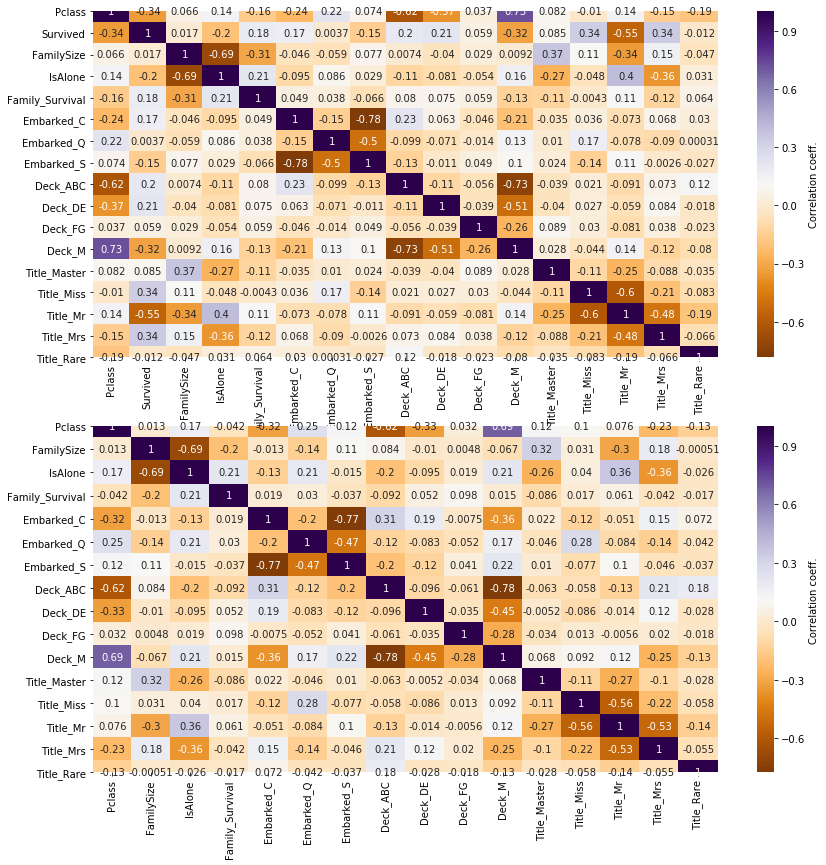

In [62]:
fig, axs=plt.subplots(2,1, figsize=(14,14))
sns.heatmap(train.corr(), ax=axs[0], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")
sns.heatmap(test.corr(),  ax=axs[1], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")

In [65]:
#measuring the accuracy
X = train.drop(['Survived'], axis=1)
X_scaled = StandardScaler().fit_transform(X)
y = train.Survived.copy()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)

model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) #test labels, true response values
print('The accuracy of the Logistic Regression is:',accuracy)

ValueError: could not convert string to float: 'male'

ValueError: could not convert string to float: 'male'